In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [5]:
# Load the Excel file
file_path = '/Users/zhazk/Desktop/Nielsen Intern/Composite_Score.xlsx'  
data = pd.read_excel(file_path)


In [7]:
# 1. Descriptive Statistics
desc_stats = data.describe()
print("Descriptive Statistics:")
print(desc_stats)
desc_stats_excel_path = '/Users/zhazk/Desktop/Nielsen Intern/descriptive_statistics.xlsx' 
desc_stats.to_excel(desc_stats_excel_path)
print(f"Descriptive statistics saved to {desc_stats_excel_path}")

Descriptive Statistics:
       Final Adjusted Frequency(0.2)  Program Factor  DE&I Factor  \
count                     616.000000      616.000000   616.000000   
mean                        0.337240        0.407143     0.233442   
std                         0.072095        0.297110     0.319937   
min                         0.254995        0.000000     0.000000   
25%                         0.254995        0.000000     0.000000   
50%                         0.380407        0.400000     0.000000   
75%                         0.404157        0.800000     0.400000   
max                         0.404157        1.000000     1.000000   

       Type weight Factor  Popularity Perdiction Factor  Composite Score  
count          616.000000                    616.000000       616.000000  
mean             0.038404                      0.139610         0.196009  
std              0.028037                      0.154833         0.107799  
min              0.014900                      0.00000

In [8]:
# 2. Correlation Analysis
correlation_matrix = data[['Program Factor', 'DE&I Factor', 'Type weight Factor', 'Popularity Perdiction Factor', 'Composite Score']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)
correlation_matrix_excel_path = '/Users/zhazk/Desktop/Taxonomy/correlation_matrix.xlsx' 
correlation_matrix.to_excel(desc_stats_excel_path)
print(f"Descriptive statistics saved to {desc_stats_excel_path}")


Correlation Matrix:
                              Program Factor  DE&I Factor  Type weight Factor  \
Program Factor                      1.000000    -0.211892            0.002546   
DE&I Factor                        -0.211892     1.000000            0.087278   
Type weight Factor                  0.002546     0.087278            1.000000   
Popularity Perdiction Factor        0.011866     0.105827           -0.159381   
Composite Score                     0.536094     0.634541            0.015785   

                              Popularity Perdiction Factor  Composite Score  
Program Factor                                    0.011866         0.536094  
DE&I Factor                                       0.105827         0.634541  
Type weight Factor                               -0.159381         0.015785  
Popularity Perdiction Factor                      1.000000         0.444739  
Composite Score                                   0.444739         1.000000  
Descriptive statistics s

In [9]:
#3.Regression Analysis

# Prepare independent and dependent variables
X = data[['Program Factor', 'DE&I Factor', 'Type weight Factor', 'Popularity Perdiction Factor']]
y = data['Composite Score']

# Add a constant (intercept)
X = sm.add_constant(X)

# Perform linear regression analysis
model = sm.OLS(y, X).fit()
print("\nRegression Analysis Results:")
print(model.summary())



Regression Analysis Results:
                            OLS Regression Results                            
Dep. Variable:        Composite Score   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 8.878e+12
Date:                Mon, 19 Aug 2024   Prob (F-statistic):               0.00
Time:                        18:01:53   Log-Likelihood:                 8132.6
No. Observations:                 616   AIC:                        -1.626e+04
Df Residuals:                     611   BIC:                        -1.623e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

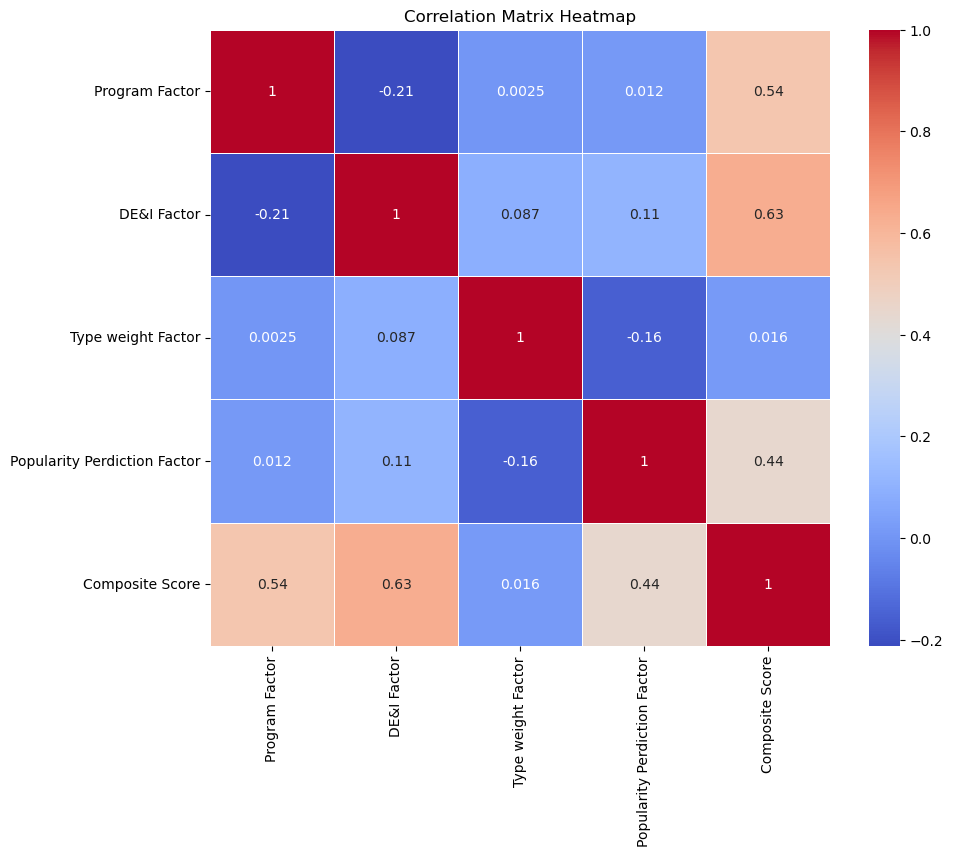

Plot saved as /Users/zhazk/Desktop/Nielsen Intern/composite_score_plot.png


In [15]:
# 4. Visualization
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
output_file_path = '/Users/zhazk/Desktop/Nielsen Intern/composite_score_plot.png' 
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {output_file_path}")

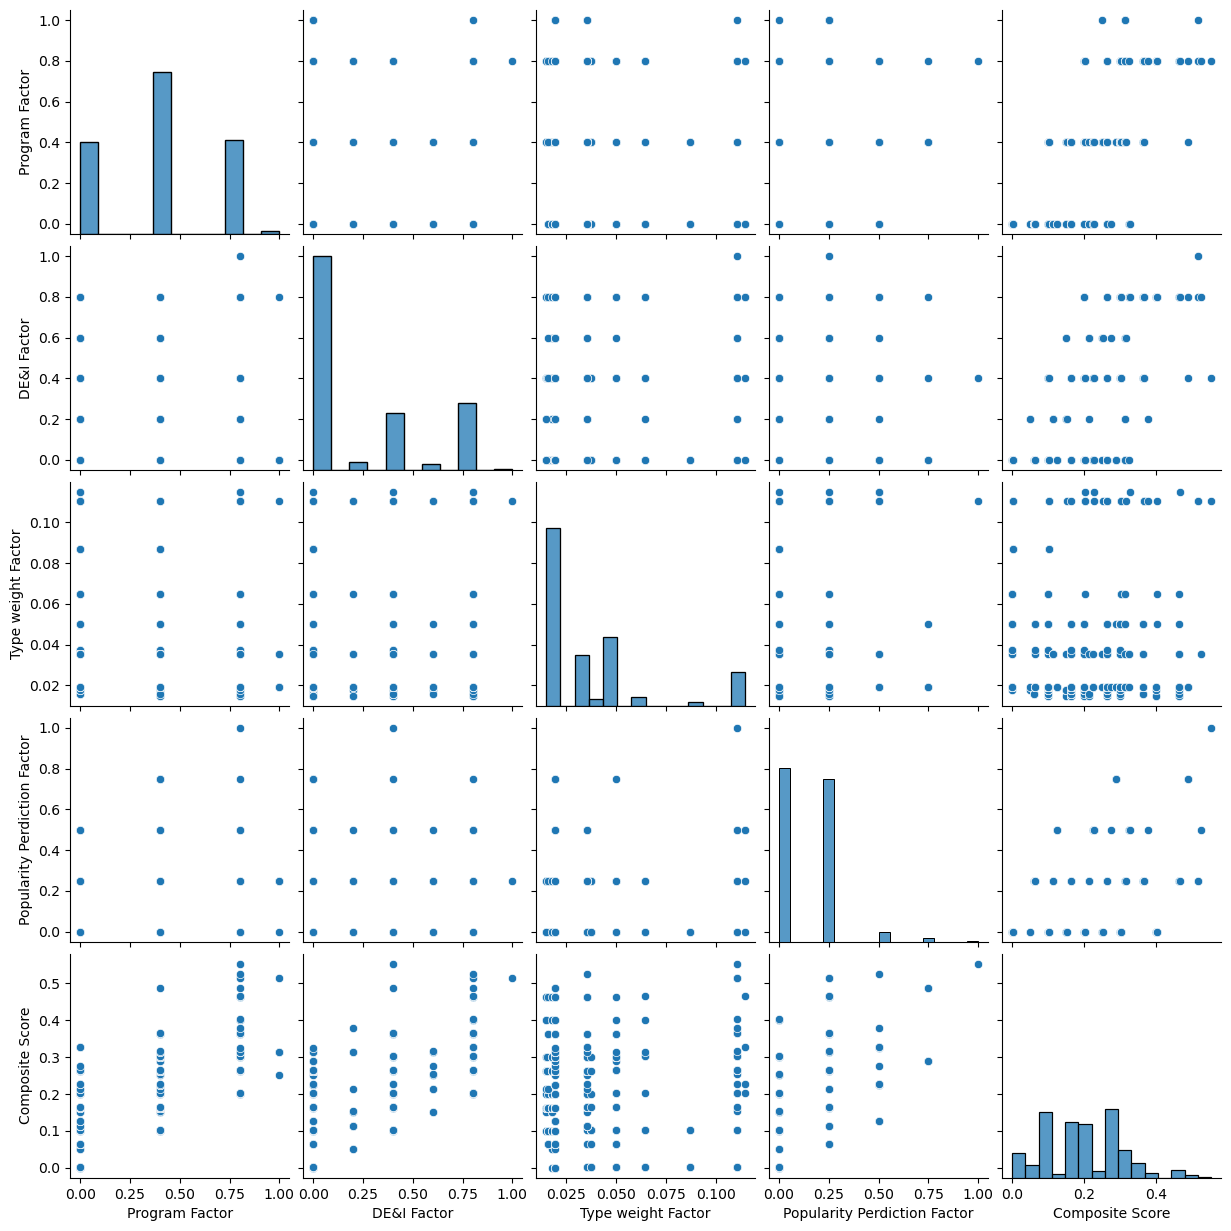

In [16]:
# Pairplot of factors and composite score
sns.pairplot(data[['Program Factor', 'DE&I Factor', 'Type weight Factor', 'Popularity Perdiction Factor', 'Composite Score']])
plt.show()

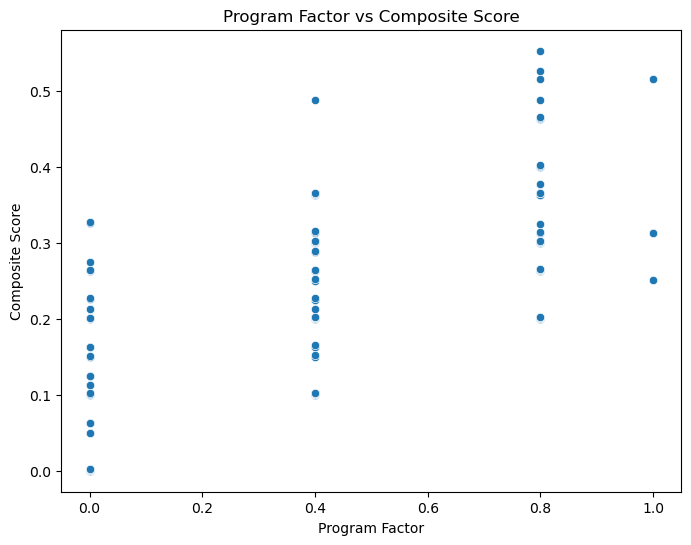

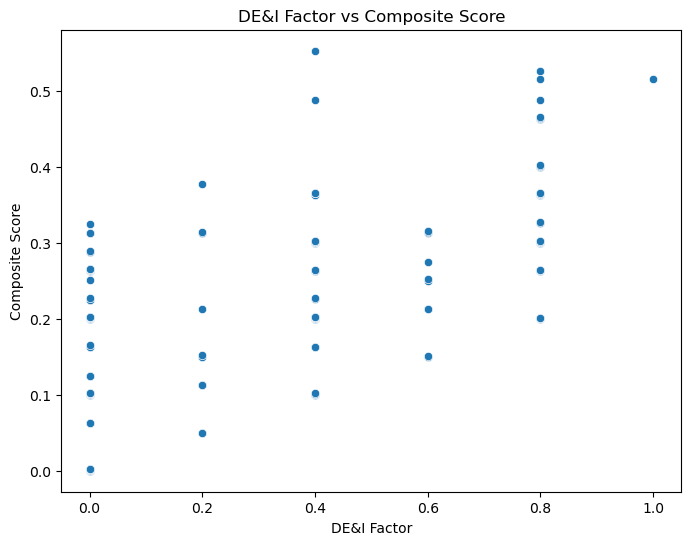

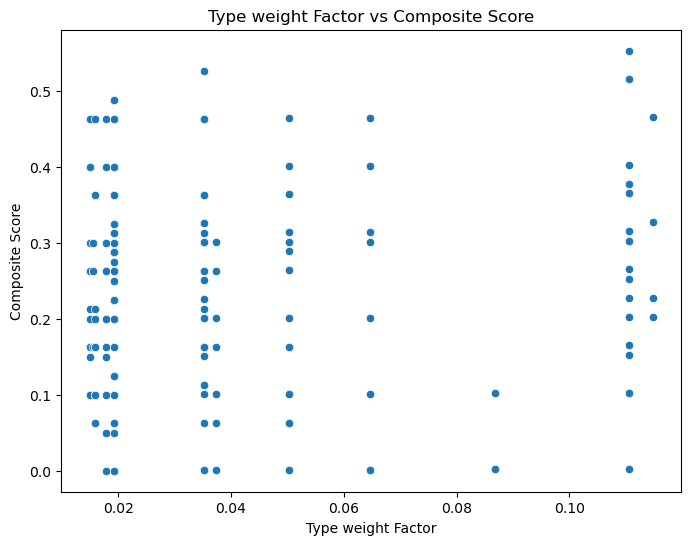

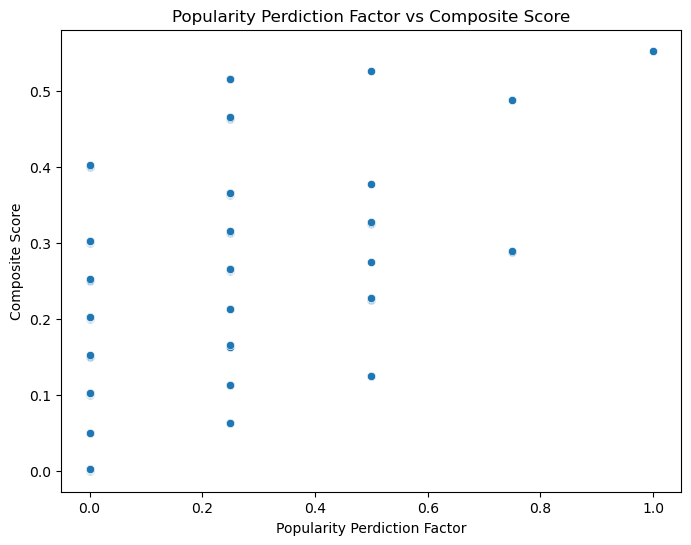

In [12]:
# Scatter plots for each factor vs composite score
for factor in ['Program Factor', 'DE&I Factor', 'Type weight Factor', 'Popularity Perdiction Factor']:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=factor, y='Composite Score', data=data)
    plt.title(f'{factor} vs Composite Score')
    plt.xlabel(factor)
    plt.ylabel('Composite Score')
    plt.show()

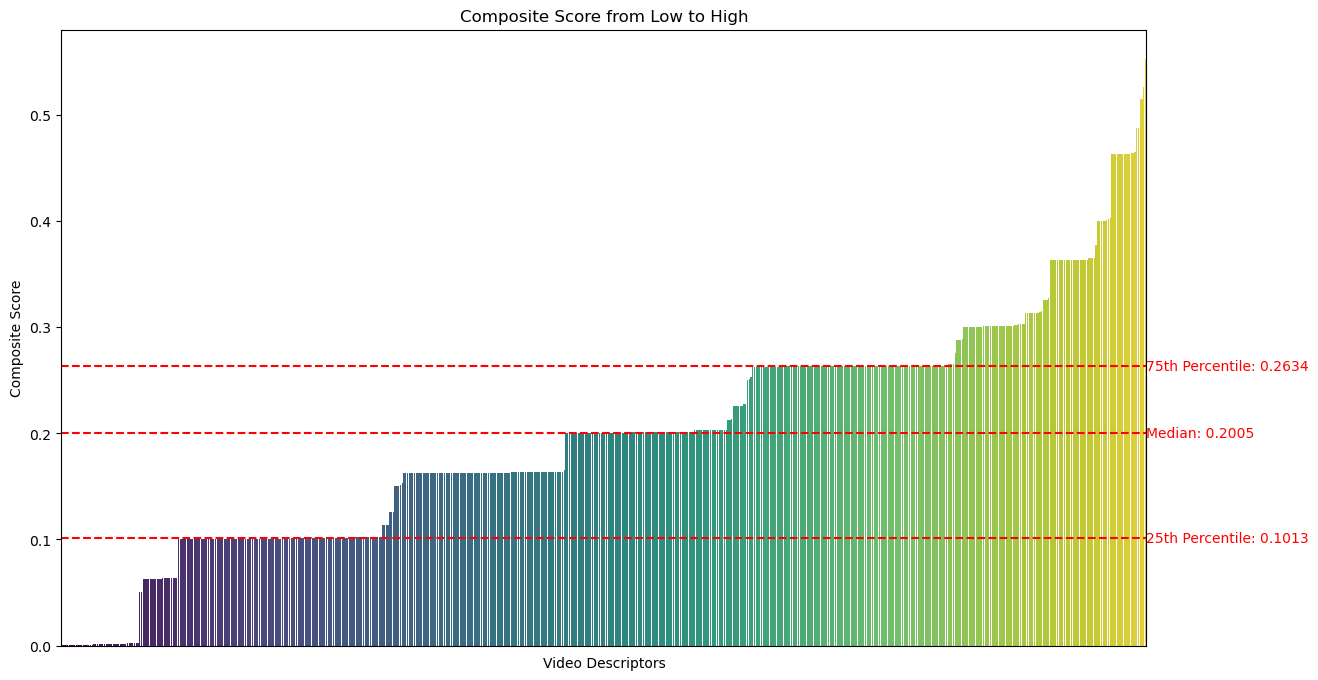

Plot saved as /Users/zhazk/Desktop/Nielsen Intern/composite_score_original.png


In [14]:
# Create a bar plot for composite score

data_sorted = data.sort_values(by='Composite Score')

plt.figure(figsize=(14, 8))
sns.barplot(x=data_sorted.index, y='Composite Score', data=data_sorted, palette='viridis')
plt.title('Composite Score from Low to High')
plt.xlabel('Video Descriptors')
plt.ylabel('Composite Score')
plt.xticks(rotation=90)  # Rotate x labels for better readability

plt.xticks([])
    
# Calculate 25th, 50th (median), and 75th percentiles
percentiles = np.percentile(data_sorted['Composite Score'], [25, 50, 75])

# Add percentile lines
for perc, label in zip(percentiles, ['25th Percentile', 'Median', '75th Percentile']):
    plt.axhline(y=perc, color='red', linestyle='--')
    plt.text(len(data_sorted) - 1, perc, f'{label}: {perc:.4f}', color='red', va='center')    

output_file_path = '/Users/zhazk/Desktop/Nielsen Intern/composite_score_original.png' 
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {output_file_path}")

plt.show()

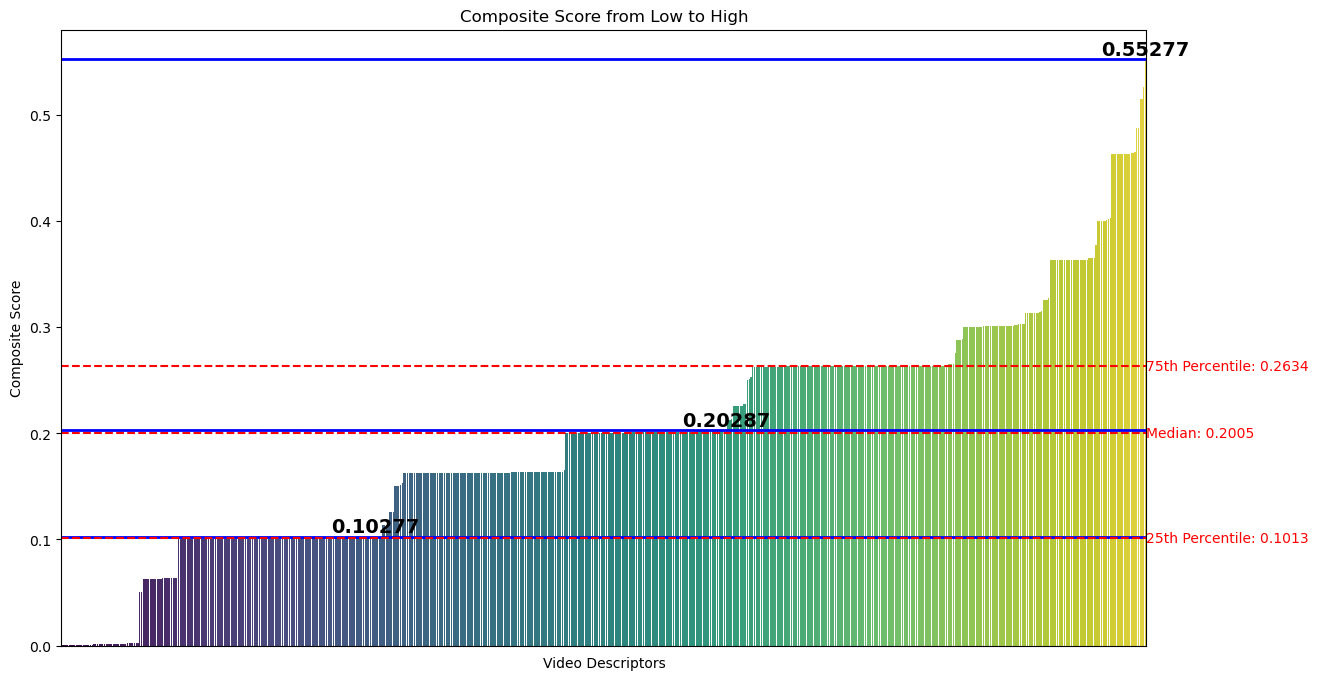

Plot saved as /Users/zhazk/Desktop/Nielsen Intern/composite_score_final.png


In [17]:
# Create a bar plot for composite score

data_sorted = data.sort_values(by='Composite Score')

plt.figure(figsize=(14, 8))
sns.barplot(x=data_sorted.index, y='Composite Score', data=data_sorted, palette='viridis')
plt.title('Composite Score from Low to High')
plt.xlabel('Video Descriptors')
plt.ylabel('Composite Score')
plt.xticks(rotation=90)  # Rotate x labels for better readability

plt.xticks([])
    
# Add specific value labels and blue lines
specific_values = [0.10277, 0.20287, 0.55277]
for value in specific_values:
    # Find the index of the specific value
    index = data_sorted[data_sorted['Composite Score'].round(5) == round(value, 5)].index[0]
    # Add the text label
    plt.text(index, value, str(value), color='black', ha="center", va="bottom",fontsize=14, weight='bold')
    # Add blue line
    plt.axhline(y=value, color='blue', linestyle='-', linewidth=2)

# Calculate 25th, 50th (median), and 75th percentiles
percentiles = np.percentile(data_sorted['Composite Score'], [25, 50, 75])

# Add percentile lines
for perc, label in zip(percentiles, ['25th Percentile', 'Median', '75th Percentile']):
    plt.axhline(y=perc, color='red', linestyle='--')
    plt.text(len(data_sorted) - 1, perc, f'{label}: {perc:.4f}', color='red', va='center')    

output_file_path = '/Users/zhazk/Desktop/Nielsen Intern/composite_score_final.png' 
plt.savefig(output_file_path, bbox_inches='tight')
plt.show()
print(f"Plot saved as {output_file_path}")

plt.show()
